In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df.shape

(1727, 7)

In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
for col in df.columns:
    print(col, df[col].value_counts())

buying high     432
low      432
med      432
vhigh    431
Name: buying, dtype: int64
maint high     432
low      432
med      432
vhigh    431
Name: maint, dtype: int64
doors 3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
persons more    576
4       576
2       575
Name: persons, dtype: int64
lug_boot big      576
med      576
small    575
Name: lug_boot, dtype: int64
safety high    576
med     576
low     575
Name: safety, dtype: int64
class unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [9]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [10]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [11]:
X = df.drop('class', axis=1)
y = df['class']

In [12]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape

((1381, 6), (346, 6))

In [15]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,vhigh,high,2,2,small,low
900,med,vhigh,3,4,small,med
1708,low,low,5more,2,big,high
705,high,med,4,2,med,med
678,high,med,3,2,med,med


In [16]:
import category_encoders as ce


In [17]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train =encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [18]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
900,2,2,2,2,1,2
1708,3,3,3,1,2,3
705,4,4,4,1,3,2
678,4,4,2,1,3,2


In [19]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,4,1,4,1,2,1
932,2,2,4,2,2,1
628,4,1,3,1,2,3
1497,3,1,3,2,3,2
1262,2,3,4,3,3,1


In [20]:
from sklearn.tree import DecisionTreeClassifier


In [21]:

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [22]:
y_pred = clf_gini.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 0.7688


In [24]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [25]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7922


In [26]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7922
Test set score: 0.7688


[Text(223.20000000000002, 380.52, 'X[5] <= 1.5\ngini = 0.452\nsamples = 1381\nvalue = [307, 54, 972, 48]'),
 Text(111.60000000000001, 271.8, 'gini = 0.0\nsamples = 467\nvalue = [0, 0, 467, 0]'),
 Text(334.8, 271.8, 'X[3] <= 1.5\ngini = 0.576\nsamples = 914\nvalue = [307, 54, 505, 48]'),
 Text(223.20000000000002, 163.07999999999998, 'gini = 0.0\nsamples = 299\nvalue = [0, 0, 299, 0]'),
 Text(446.40000000000003, 163.07999999999998, 'X[1] <= 2.5\ngini = 0.625\nsamples = 615\nvalue = [307, 54, 206, 48]'),
 Text(334.8, 54.360000000000014, 'gini = 0.523\nsamples = 301\nvalue = [136, 0, 157, 8]'),
 Text(558.0, 54.360000000000014, 'gini = 0.633\nsamples = 314\nvalue = [171, 54, 49, 40]')]

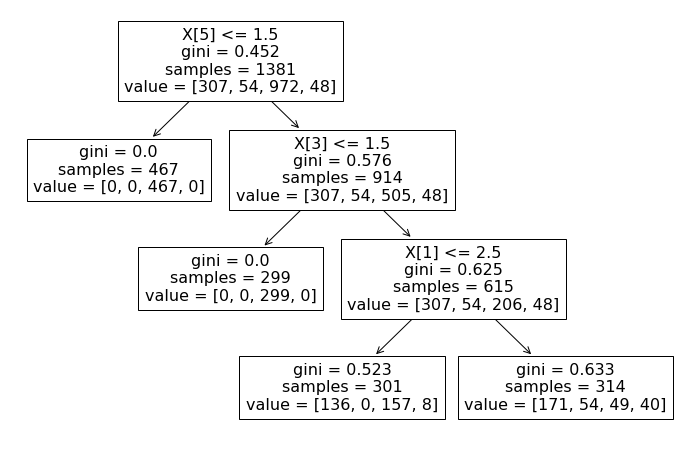

In [27]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

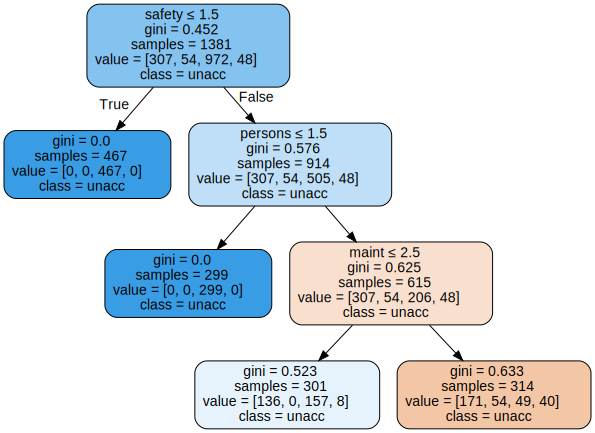

In [32]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [33]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [34]:
y_pred_en = clf_en.predict(X_test)


In [35]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7688


In [36]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [37]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))


Training-set accuracy score: 0.7922


In [38]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7922
Test set score: 0.7688


[Text(223.20000000000002, 380.52, 'X[5] <= 1.5\nentropy = 1.19\nsamples = 1381\nvalue = [307, 54, 972, 48]'),
 Text(111.60000000000001, 271.8, 'entropy = 0.0\nsamples = 467\nvalue = [0, 0, 467, 0]'),
 Text(334.8, 271.8, 'X[3] <= 1.5\nentropy = 1.466\nsamples = 914\nvalue = [307, 54, 505, 48]'),
 Text(223.20000000000002, 163.07999999999998, 'entropy = 0.0\nsamples = 299\nvalue = [0, 0, 299, 0]'),
 Text(446.40000000000003, 163.07999999999998, 'X[1] <= 2.5\nentropy = 1.624\nsamples = 615\nvalue = [307, 54, 206, 48]'),
 Text(334.8, 54.360000000000014, 'entropy = 1.147\nsamples = 301\nvalue = [136, 0, 157, 8]'),
 Text(558.0, 54.360000000000014, 'entropy = 1.711\nsamples = 314\nvalue = [171, 54, 49, 40]')]

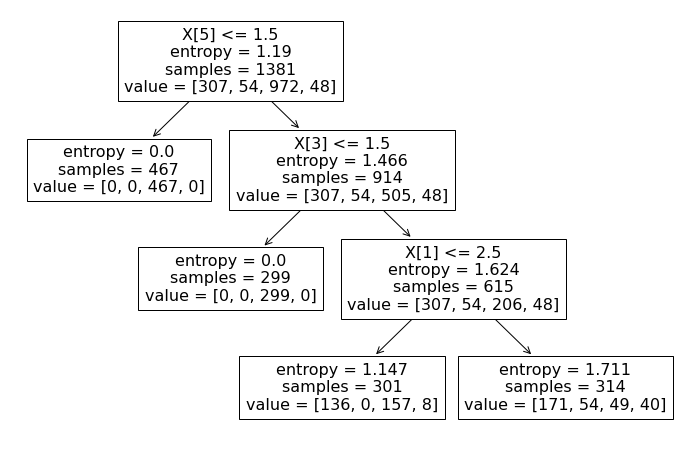

In [39]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

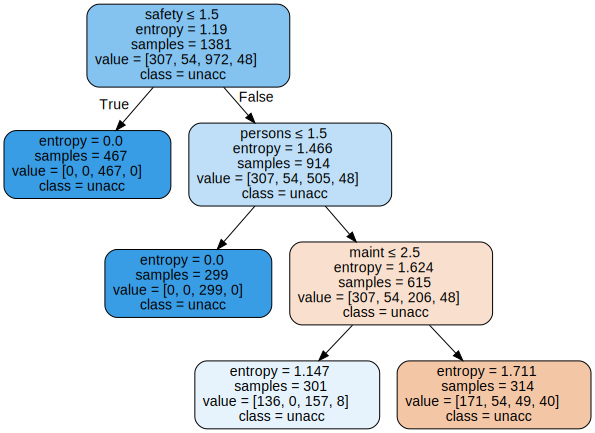

In [40]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 36   0  41   0]
 [ 15   0   0   0]
 [  7   0 230   0]
 [ 12   0   5   0]]


In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))


              precision    recall  f1-score   support

         acc       0.51      0.47      0.49        77
        good       0.00      0.00      0.00        15
       unacc       0.83      0.97      0.90       237
       vgood       0.00      0.00      0.00        17

    accuracy                           0.77       346
   macro avg       0.34      0.36      0.35       346
weighted avg       0.69      0.77      0.72       346



/home/danyal/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danyal/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danyal/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
